In [2]:
import hiddenlayer as hl

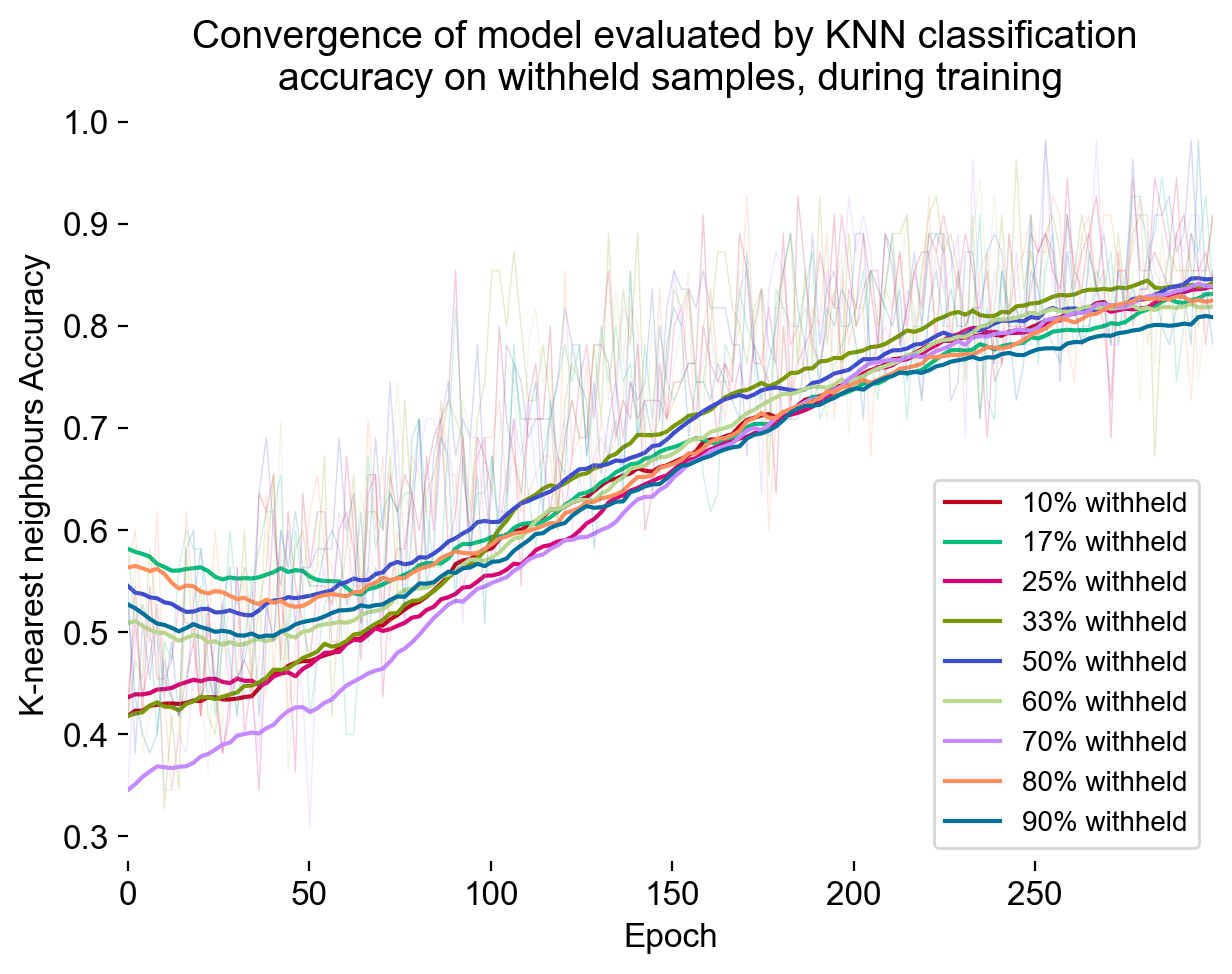

In [177]:
# h1['KNNAcc'].data
import matplotlib.pyplot as plt
import os
import numpy
import matplotlib.patheffects as PathEffects

# https://stackoverflow.com/a/68510722 (Based on tensorboard smoothing, exponential moving average)
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

colors = ["#bc001e",
"#01bd7e",
"#d90072",
"#7a9800",
"#3c4cd0",
"#b9d88f",
"#c58aff",
"#ff8f5c",
"#01709a"]

figsize = (7, 5)
plt.rcParams["figure.figsize"] = figsize
fig, ax = plt.subplots(1, dpi=200)
i = 0
files = os.listdir('./experiments')
files.sort(key=lambda x: int(x.split('.')[0].split('-')[1]))
for f in files:
    file = os.path.join('./experiments', f)
    history = hl.History()
    history.load(file)
    data = numpy.asarray(history['KNNAcc'].data)
    ynew = numpy.linspace(0, len(data), len(data))  
    openness = f.split('.')[0].split('-')[1]
    plt.plot(numpy.linspace(0, 299, len(data)), data, color=colors[i], linewidth=0.5, alpha=0.2)
    plt.plot(numpy.linspace(0, 299, len(data)), smooth(data, 0.96), label=f'{openness}% withheld', color=colors[i], linewidth=1.5)
    i+=1

[ax.spines[spine].set_visible(False) for spine in ["top", "right", "bottom", "left"]]
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "Arial"
plt.rcParams.update({'font.size': 12})
plt.ylabel('K-nearest neighbours Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
ax.axis("tight")
plt.xlim(0,299)
plt.legend(fontsize=10)
plt.title('Convergence of model evaluated by KNN classification \naccuracy on withheld samples, during training', fontsize=14)
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

plt.show()